In [46]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#download dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
#Splitting & loading dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
print(train_labels)

[9 0 0 ... 3 0 5]


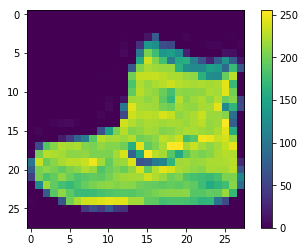

In [20]:
plt.imshow(train_images[0])
plt.colorbar()

In [7]:
print(train_images.shape)

(60000, 28, 28)


In [17]:
print(len(train_labels))

60000


In [18]:
print(test_images.shape)

(10000, 28, 28)


In [19]:
print(len(test_labels))

10000


In [21]:
#preprocessing(scaling)
train_images = train_images / 255.0
test_images = test_images / 255.0

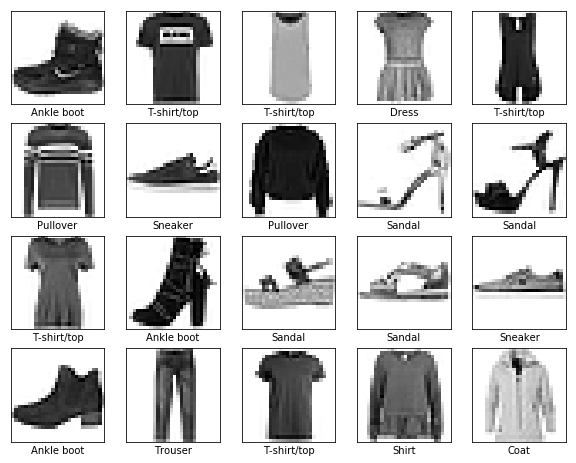

In [47]:
#Displaying the images with class names
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [24]:
#Building Model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [25]:
#Compile Model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
#Fit model
model.fit(train_images, train_labels,validation_split=0.2, epochs=10)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 13s 276us/sample - loss: 0.2817 - accuracy: 0.8950 - val_loss: 0.2863 - val_accuracy: 0.8943
Epoch 2/10
48000/48000 [==============================] - 13s 271us/sample - loss: 0.2649 - accuracy: 0.9022 - val_loss: 0.2923 - val_accuracy: 0.8917
Epoch 3/10
48000/48000 [==============================] - 13s 272us/sample - loss: 0.2563 - accuracy: 0.9048 - val_loss: 0.2833 - val_accuracy: 0.8939
Epoch 4/10
48000/48000 [==============================] - 13s 273us/sample - loss: 0.2444 - accuracy: 0.9082 - val_loss: 0.2871 - val_accuracy: 0.8944
Epoch 5/10
48000/48000 [==============================] - 13s 275us/sample - loss: 0.2363 - accuracy: 0.9111 - val_loss: 0.2988 - val_accuracy: 0.8907
Epoch 6/10
48000/48000 [==============================] - 13s 273us/sample - loss: 0.2293 - accuracy: 0.9146 - val_loss: 0.2815 - val_accuracy: 0.8968
Epoch 7/10
48000/48000 [====================

In [28]:
#Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 2s 153us/sample - loss: 0.3419 - accuracy: 0.8855
Test accuracy: 0.8855


In [49]:
#Make Predictions
# Add the image to a batch where it's the only member.
img = (np.expand_dims(test_images[1],0))

print(img.shape)



(1, 28, 28)


In [50]:
prediction_single=model.predict(img)
print(prediction_single)

[[7.3733361e-05 1.8668816e-14 9.9949038e-01 1.3768630e-09 3.4430690e-04
  2.5929813e-18 9.1493159e-05 2.3808207e-21 1.4017460e-11 1.6316569e-13]]


In [51]:
np.argmax(prediction_single)

2

In [52]:
test_labels[1]

2

The test label as well as predicted label is 2 which is t-shirt/top

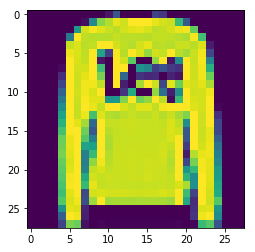

In [53]:
plt.imshow(test_images[1])